In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df = pd.read_csv('data/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Mo\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mo\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mo\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mo\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping wi

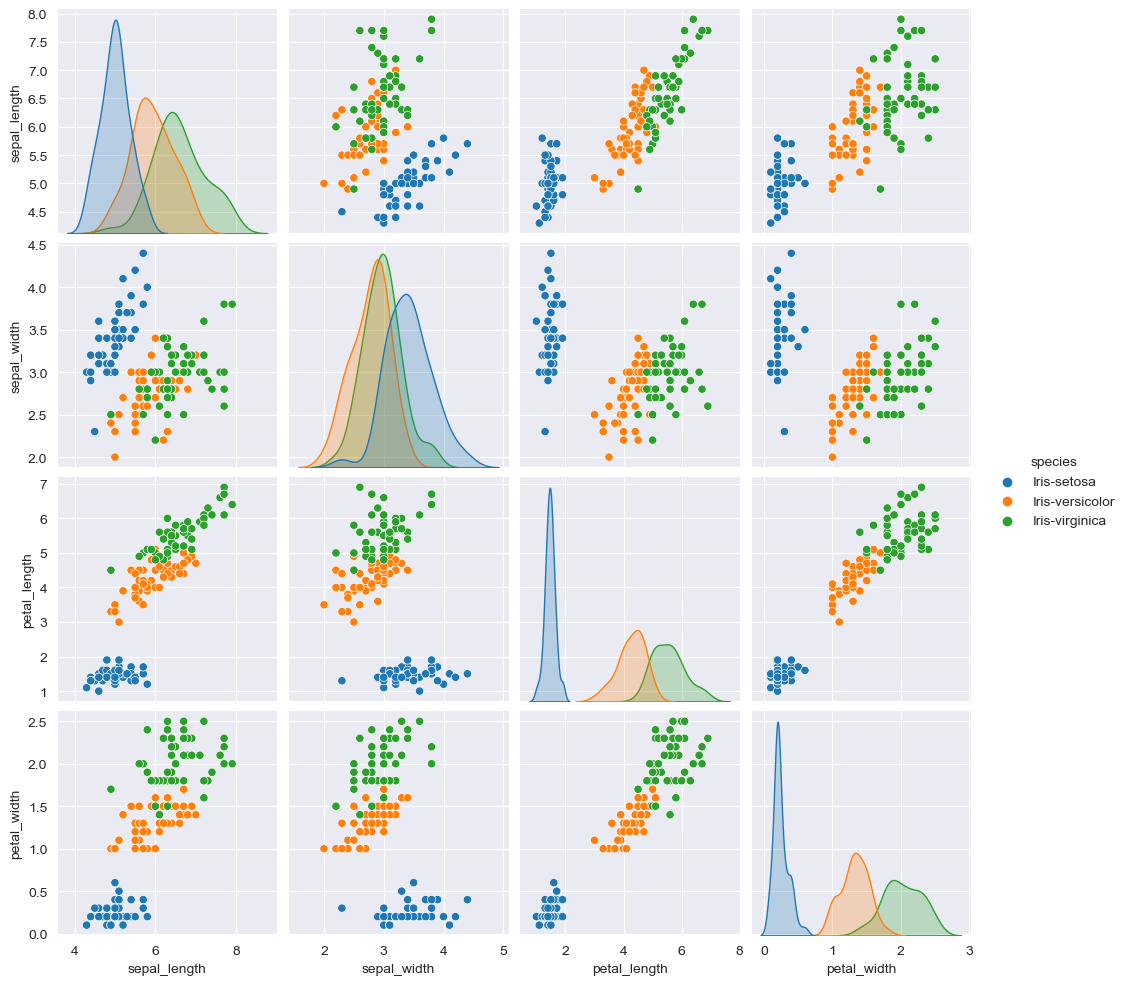

In [7]:
sns.pairplot(df, hue='species')
plt.savefig('images/fig2.png')
plt.show()

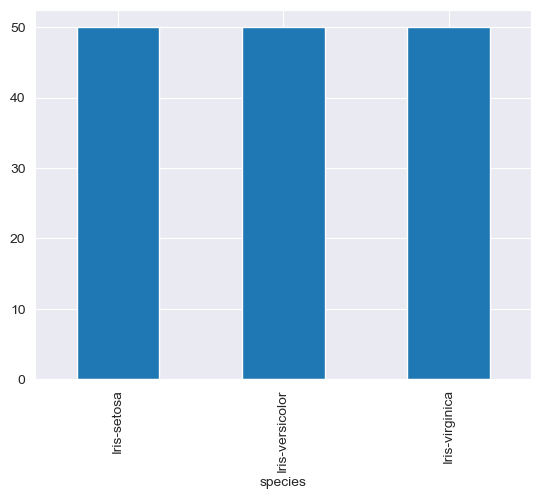

In [8]:
df.groupby('species')['species'].count().plot.bar()
plt.savefig('images/fig3.png')
plt.show()

In [9]:
x = df.drop('species', axis=1)
y = df['species']

# Unsupervised Learning

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(x)

C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mo\.conda\envs\ml\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mo\.conda\envs\ml\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Mo\.conda\envs\ml\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^

KMeans(n_clusters=3, random_state=42)

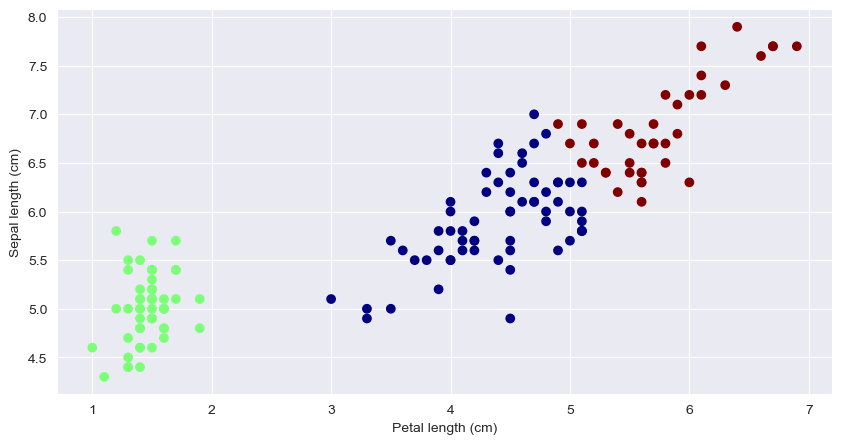

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(x=x.petal_length, y=x.sepal_length, c=model.labels_, cmap='jet')

plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')

plt.savefig('images/fig4.png')
plt.show()

In [12]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=42)
model.fit(x)

IsolationForest(random_state=42)

Number of outliers: 38


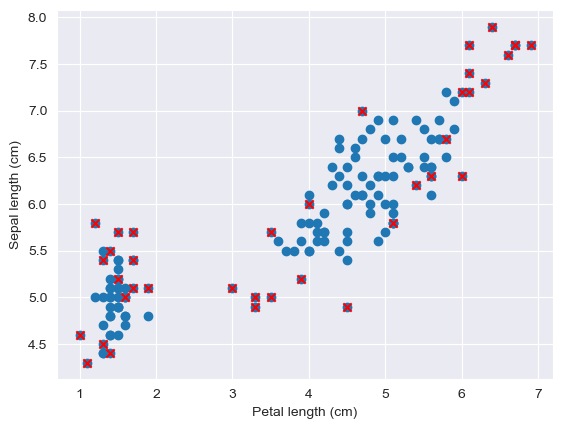

In [13]:
y_pred = model.predict(x)
outliers = np.where(y_pred == -1)[0]

print("Number of outliers:", len(outliers))

plt.scatter(x['petal_length'], x['sepal_length'])
plt.scatter(x.iloc[outliers]['petal_length'], x.iloc[outliers]['sepal_length'], c="red", marker="x")

plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')

plt.savefig('images/fig5.png')
plt.show()

# Supervised Learning

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [16]:
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
print(f'F1: {f1_score(y_test, y_pred, average="micro")}')

F1: 0.9666666666666667


# Model Comparison

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import CategoricalNB

models = [LogisticRegression(random_state=42), SVC(random_state=42),
          RandomForestClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42), CategoricalNB()]

for m in models:
    m.fit(x_train, y_train)

In [18]:
from sklearn.model_selection import cross_val_score

for m in models:
    y_pred = m.predict(x_test)
    scores = cross_val_score(m, x, y, cv=3)

    print(
        f'{m.__class__.__name__}: {scores.mean():0.3f} accuracy with a std of {scores.std():0.3f}, f1= {f1_score(y_test, y_pred, average="micro"):.3f}')

C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.973 accuracy with a std of 0.009, f1= 0.967
SVC: 0.960 accuracy with a std of 0.016, f1= 0.933
RandomForestClassifier: 0.967 accuracy with a std of 0.019, f1= 0.933
GradientBoostingClassifier: 0.967 accuracy with a std of 0.019, f1= 0.933
AdaBoostClassifier: 0.953 accuracy with a std of 0.025, f1= 0.933
CategoricalNB: 0.933 accuracy with a std of 0.025, f1= 0.942


# Model Tuning

In [19]:
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 200, 300, 500, 1000],
    'C': loguniform.rvs(1e-6, 10, size=30),
    'tol': [1e-6, 1e-5, 1e-4, 1e-3]
}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, n_jobs=-1, cv=3, scoring='f1_micro')

grid.fit(x_train, y_train.values.ravel())

C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12600 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([3.48774190e+00, 3.47964019e-01, 7.94792856e-05, 3.97998620e-06,
       6.37563597e-05, 1.27057186e-04, 1.72048955e-01, 1.72739767e-01,
       5.81635718e-03, 3.87634680e-01, 1.66868745e-01, 5.66996110e-03,
       6.45960925e-05, 7.49753445e-02, 9.01397672e-06, 2.40739484e+00,
       3.02165733e-0...6e-04, 1.18257213e-03,
       5.25597318e-03, 6.14993804e-04, 1.06292110e-04, 1.54985823e-02,
       6.65891929e-03, 4.24307540e-01, 1.61817296e-04, 1.86863075e-03,
       5.36264488e+00, 3.37901181e-02]),
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             scoring='f1_micro')

In [20]:
grid.best_params_

{'C': 3.487741901190118,
 'max_iter': 100,
 'penalty': None,
 'solver': 'newton-cg',
 'tol': 1e-06}

In [21]:
best = LogisticRegression(random_state=42, **grid.best_params_)
best.fit(x_train, y_train)

C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Mo\.conda\envs\ml\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=3.487741901190118, penalty=None, random_state=42,
                   solver='newton-cg', tol=1e-06)

In [22]:
y_pred = best.predict(x_test)
print(f'F1: {f1_score(y_test, y_pred, average="micro")}')

F1: 0.975


In [23]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier

clf = VotingClassifier([
    ('1', BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)),
    ('2', BaggingClassifier(estimator=GradientBoostingClassifier(random_state=42), random_state=42)),
    ('3', BaggingClassifier(estimator=SVC(random_state=42), random_state=42)),
    ('4', BaggingClassifier(LogisticRegression(random_state=42), random_state=42))
])
clf.fit(x_train, y_train)

VotingClassifier(estimators=[('1',
                              BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                                random_state=42)),
                             ('2',
                              BaggingClassifier(estimator=GradientBoostingClassifier(random_state=42),
                                                random_state=42)),
                             ('3',
                              BaggingClassifier(estimator=SVC(random_state=42),
                                                random_state=42)),
                             ('4',
                              BaggingClassifier(estimator=LogisticRegression(random_state=42),
                                                random_state=42))])

In [24]:
y_pred = clf.predict(x_test)
print(f'F1: {f1_score(y_test, y_pred, average="micro")}')

F1: 0.9416666666666667
